# Instalação e dependências

In [1]:
!pip install -q translate
!pip install -q nltk
!pip install -q wordcloud
!pip install -q plotly
!pip install -q googletrans
!pip install -q deep_translator

import nltk
nltk.download('stopwords')
nltk.download('rslp')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from translate import Translator
from textblob import TextBlob
from collections import Counter
from nltk.corpus import stopwords
from deep_translator import GoogleTranslator
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import string

# Baixar o dicionário do VADER para sentiment analysis
nltk.download('vader_lexicon')
stop_words = set(stopwords.words("portuguese"))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Dados

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/datas-csv/refs/heads/main/depoimentos.csv')
df.info()
print()
for depoimento in df['depoimento'].head(5):
    print(depoimento)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    int64 
 1   data        100 non-null    object
 2   depoimento  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB

Ambiente aconchegante e atendimento simpático; comida saborosa.
Atendimento excelente, mas o tempo de preparo dos pratos é muito longo.
A comida é deliciosa e o serviço é sempre cordial.
Ótima experiência, com ambiente agradável e equipe atenciosa.
Serviço impecável, porém a demora no preparo compromete a experiência.


# Traduções

In [ ]:
# from translate import Translator

# # Criar um objeto de tradução
# translator = Translator(to_lang="pt-br")

# # Traduzir uma frase
# translation = translator.translate("I am a student.")
# print()
# print(translation)  # Saída esperada: "Sou um estudante"

In [ ]:
# from deep_translator import GoogleTranslator

# # Criar o modelo de tradução
# translator = GoogleTranslator(source='auto', target='en')

# # Traduzir uma única frase do português para o inglês
# text = 'Esta é uma frase que queremos traduzir para o inglês'
# translation = translator.translate(text)

# # Exibir a tradução
# print(translation)

# Analisando os sentimemtos

In [ ]:
'''
TextBlob é uma biblioteca NLP simples que é construída sobre as
bibliotecas NLTK (Natural Language Toolkit) e Pattern.
Ela fornece uma interface fácil de usar para tarefas NLP
comuns, incluindo análise de sentimentos.
'''

# Sample text
text = "I love this product! It's amazing for me."
# Create a TextBlob object
blob = TextBlob(text)
# Perform sentiment analysis
sentiment = blob.sentiment
print(sentiment)  # Output: Sentiment(polarity=0.61, subjectivity=0.75)

Sentiment(polarity=0.6125, subjectivity=0.75)


In [ ]:
# Definindo uma frase para análise de sentimento
# O texto diz: "A água congela a 0 graus Celsius."
text = "Water freezes at 0 degrees Celsius."

# Criando um objeto TextBlob com a frase fornecida
blob = TextBlob(text)

# Realizando a análise de sentimento da frase
sentiment = blob.sentiment

# Imprimindo o resultado da análise de sentimento
print(sentiment)  # Saída esperada: Sentiment(polarity=0.0, subjectivity próxima de 0.0)

Sentiment(polarity=0.0, subjectivity=0.0)


In [ ]:
# Lista de resenhas de exemplo
reviews = [
  # O produto é fantástico e superou as expectativas
  "This product is fantastic! It exceeded my expectations.",

  # Insatisfação com o preço e qualidade do produto
  "Not worth the price. I'm disappointed with the quality.",

  # O produto tem um bom custo-benefício e seria comprado novamente
  "Good value for money. Will buy again.",
]

# Inicializar o analisador de sentimentos VADER
sia = SentimentIntensityAnalyzer()

# Analisar o sentimento de cada resenha
for review in reviews:
    # Obter a pontuação de polaridade (sentimento) da resenha
    sentiment = sia.polarity_scores(review)

    # Exibir a resenha e o resultado da análise de sentimento
    print(f"Review: {review}\nSentiment: {sentiment}\n")

Review: This product is fantastic! It exceeded my expectations.
Sentiment: {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.5983}

Review: Not worth the price. I'm disappointed with the quality.
Sentiment: {'neg': 0.405, 'neu': 0.595, 'pos': 0.0, 'compound': -0.5812}

Review: Good value for money. Will buy again.
Sentiment: {'neg': 0.0, 'neu': 0.485, 'pos': 0.515, 'compound': 0.6486}



In [ ]:
# Lista de resenhas de exemplo em português
reviews = [
  "Produto é maravilhoso",

  "Odiei o produto, decepcionado."
]

# Inicializa o analisador de sentimentos VADER
sia = SentimentIntensityAnalyzer()

# Analisar o sentimento de cada resenha
for review in reviews:
    # O analisador VADER foi treinado para textos em inglês. Aqui, ao aplicar em português, os resultados podem ser imprecisos.
    sentiment = sia.polarity_scores(review)

    # Exibe a resenha e o resultado da análise de sentimento
    print(f"Review: {review}\nSentiment: {sentiment}\n")

Review: Produto é maravilhoso
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Review: Odiei o produto, decepcionado.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}



O código acima utiliza o VADER Sentiment Analyzer, que foi otimizado para análise de sentimentos em inglês.

Ao aplicá-lo a resenhas em português, como nas que estão presentes no exemplo, pode haver problemas de precisão, já que o modelo pode não reconhecer corretamente as palavras ou expressões características do idioma português.

Isso pode levar a resultados imprecisos ou errôneos.

Para obter melhores resultados, seria necessário usar um modelo de análise de sentimentos treinado especificamente para o português ou, alternativamente, traduzir as resenhas para inglês antes de aplicar a análise.

In [ ]:
# Inicializa o analisador de sentimentos VADER
# Inicializa o tradutor (Google Translate)


# Lista de reviews de exemplo (em português)
reviews = [
    "Produto é maravilhoso",
    "Odiei o produto, decepcionado."
]

# Lista de reviews de exemplo (em português)
reviews = [
    "The product is wonderful",
    "I hated the product, disappointed."
]

# Função para traduzir o texto de português para inglês
# def translate_to_english(text):
#     return GoogleTranslator(source='auto', target='en').translate(text)

# Laço para analisar o sentimento de cada resenha
for review in reviews:
    # Traduz a resenha do português para o inglês
    # translated_review = translate_to_english(review)

    # Calcula a pontuação de polaridade (sentimento) da resenha traduzida
    sentiment = sia.polarity_scores(review)

    # Exibe a resenha original, tradução e análise de sentimento
    print(f"Review (PT): {review}")
    print(f"Sentiment: {sentiment}\n")

Review (PT): The product is wonderful
Sentiment: {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

Review (PT): I hated the product, disappointed.
Sentiment: {'neg': 0.785, 'neu': 0.215, 'pos': 0.0, 'compound': -0.8074}



# Analisando a base de depoimentos

In [ ]:
# Função para traduzir o texto para inglês
# def translate_to_english(text):
#   try:
#     return GoogleTranslator(source='auto', target='en').translate(text)
#   except:
#     return ''

# # Criar a nova coluna traduzida
# df["depoimento_en"] = df["depoimento"].apply(translate_to_english)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/depoimentos-csv/refs/heads/main/depoimentos_en.csv')
df.head()

,id,data,depoimento,depoimento_en
0,1,2023-01-01,Ambiente aconchegante e atendimento simpático;...,Cozy atmosphere and friendly service; tasty food.
1,2,2023-01-02,"Atendimento excelente, mas o tempo de preparo ...","Excellent service, but the preparation time fo..."
2,3,2023-01-03,A comida é deliciosa e o serviço é sempre cord...,The food is delicious and the service is alway...
3,4,2023-01-04,"Ótima experiência, com ambiente agradável e eq...","Great experience, with a pleasant atmosphere a..."
4,5,2023-01-05,"Serviço impecável, porém a demora no preparo c...","Impeccable service, but the delay in preparati..."


In [ ]:
sia = SentimentIntensityAnalyzer()

# Função para calcular a polaridade do texto
def get_polarity(text):
    return sia.polarity_scores(text)["compound"]

# Criar a nova coluna de polaridade
df["polarity"] = df["depoimento_en"].apply(get_polarity)

# Exibir o DataFrame atualizado
df.head()

,id,data,depoimento,depoimento_en,polarity
0,1,2023-01-01,Ambiente aconchegante e atendimento simpático;...,Cozy atmosphere and friendly service; tasty food.,0.4939
1,2,2023-01-02,"Atendimento excelente, mas o tempo de preparo ...","Excellent service, but the preparation time fo...",0.3291
2,3,2023-01-03,A comida é deliciosa e o serviço é sempre cord...,The food is delicious and the service is alway...,0.7906
3,4,2023-01-04,"Ótima experiência, com ambiente agradável e eq...","Great experience, with a pleasant atmosphere a...",0.8126
4,5,2023-01-05,"Serviço impecável, porém a demora no preparo c...","Impeccable service, but the delay in preparati...",-0.4497


In [ ]:
# Função para categorizar o sentimento
def classify_sentiment(score):
    if score >= 0.05:
        return "positivo"
    elif score <= -0.05:
        return "negativo"
    else:
        return "neutro"

# Criar a nova coluna "sentimento"
df["sentimento"] = df["polarity"].apply(classify_sentiment)

# Exibir o DataFrame atualizado
df.head(100)
df.to_csv("df_sentimentos.csv", index=False)

In [ ]:
df["sentimento"].value_counts()

,count
sentimento,
positivo,80
negativo,10
neutro,10


In [ ]:
# Contar a quantidade de cada sentimento
sentiment_counts = df["sentimento"].value_counts()

# Criar o gráfico de barras
fig = px.bar(
    x=sentiment_counts.index,  # Rótulos (Positivo, Neutro, Negativo)
    y=sentiment_counts.values,  # Contagem de cada sentimento
    color=sentiment_counts.index,  # Cor diferente para cada categoria
    labels={"x": "Sentimento", "y": "Quantidade"},
    title="Distribuição dos Sentimentos nos Depoimentos"
)

# Exibir o gráfico
fig.show()

In [ ]:
# Filtrar apenas os depoimentos negativos em português
depoimentos_negativos = df[df["sentimento"] == "negativo"]["depoimento"]

# Função para processar e extrair palavras-chave
def extract_keywords(texts):
    all_words = []

    for text in texts:
        words = text.lower().translate(str.maketrans("", "", string.punctuation)).split()  # Remover pontuação e dividir palavras
        words = [word for word in words if word not in stop_words]  # Remover stopwords
        all_words.extend(words)

    return Counter(all_words).most_common(10)  # Retornar as 10 palavras mais comuns

# Obter as principais causas dos depoimentos negativos
top_negative_causes = extract_keywords(depoimentos_negativos)

# Exibir o resultado
print("Principais causas dos depoimentos negativos:")
for word, count in top_negative_causes:
    print(f"{word}: {count} vezes")

Principais causas dos depoimentos negativos:
serviço: 10 vezes
impecável: 10 vezes
porém: 10 vezes
demora: 10 vezes
preparo: 10 vezes
compromete: 10 vezes
experiência: 10 vezes


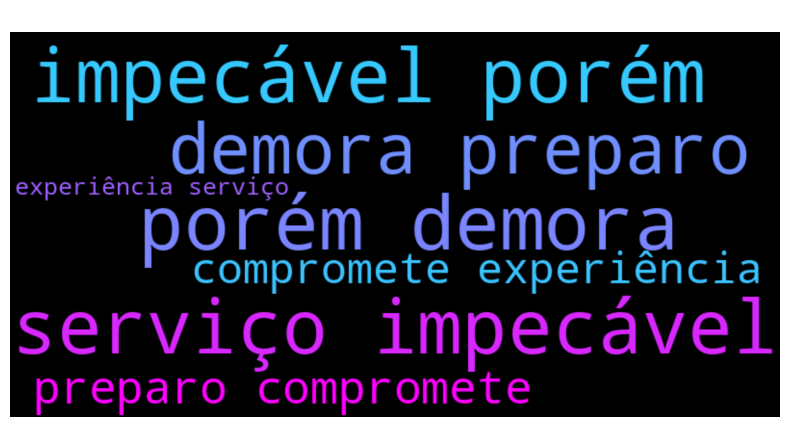

In [ ]:
# Filtrar apenas os depoimentos negativos em português
depoimentos_negativos = df[df["sentimento"] == "negativo"]["depoimento"]

# Concatenar todos os depoimentos em um único texto
text = " ".join(depoimentos_negativos)

# Remover pontuação e stopwords
words = text.lower().translate(str.maketrans("", "", string.punctuation)).split()
filtered_text = " ".join([word for word in words if word not in stop_words])

# Criar a nuvem de palavras com fundo preto
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="black",  # Fundo preto
    colormap="cool"  # Cores em tons de azul
).generate(filtered_text)

# Exibir o Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="quadric")
plt.axis("off")  # Esconder eixos
plt.title("Palavras mais comuns nos depoimentos negativos", fontsize=12, color="white")  # Título branco para contraste
plt.show()

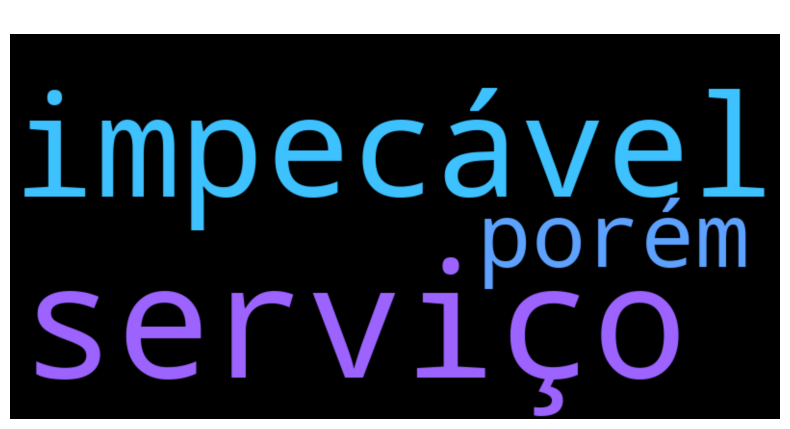

In [ ]:
# Remover pontuação e stopwords
words = text.lower().translate(str.maketrans("", "", string.punctuation)).split()
filtered_words = [word for word in words if word not in stop_words]

# Contar a frequência das palavras
word_counts = Counter(filtered_words)

# Selecionar as 5 palavras mais citadas
top_3_words = word_counts.most_common(3)


# Criar o Word Cloud apenas com as 5 palavras mais citadas
top_3_text = " ".join([word for word, count in top_3_words])

# Gerar o Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="black",  # Fundo preto
    colormap="cool"  # Cores em tons de azul
).generate(top_3_text)

# Exibir o Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="quadric")
plt.axis("off")  # Esconder eixos
plt.title("Top 5 palavras mais citadas nos depoimentos negativos", fontsize=15, color="white")  # Título branco
plt.show()


# Insights dos Depoimentos


## Sentimento Positivo
- **Observação:** A maioria dos depoimentos é positiva.
- **Elogios:**  
  - Ambiente aconchegante  
  - Comida saborosa  
  - Atendimento simpático e cordial  
- **Conclusão:**  
  - A experiência do cliente é, em geral, muito boa.

## Sentimento Negativo
- **Observação:** Alguns depoimentos apontam pontos negativos.
- **Críticas Comuns:**  
  - Demora no preparo dos pratos
- **Conclusão:**  
  - A agilidade no preparo dos pratos é uma área que pode ser melhorada para elevar ainda mais a satisfação dos clientes.

## Sentimento Neutro
- **Observação:**  
  - Não há depoimentos neutros no conjunto analisado.
- **Interpretação:**  
  - A ausência de depoimentos neutros indica que os clientes expressam opiniões bem definidas, seja de forma positiva ou negativa.

# Analisando com IA Generativa - Minas

In [ ]:
reviews = [
    "Ô trem bão, viu? Carrega rapidim e dura o dia todo!",
    "Recomendo demais da conta! Funciona que é uma beleza.",
    "Uai, sô... esse troço esquenta mais que fogão a lenha!",
    "Achei que era bão, mas a bateria dura menos que festa de São João chovendo.",
    "Funciona direitim, mas nada de outro mundo.",
    "Faz o que promete, mas esperava mais pelo preço.",
    "Carrega tão rápido que até minha paciência ganha tempo...",
    "Esse fone cancela tanto o ruído que até a música some!"
]

for review in reviews:
    print(review)

Ô trem bão, viu? Carrega rapidim e dura o dia todo!
Recomendo demais da conta! Funciona que é uma beleza.
Uai, sô... esse troço esquenta mais que fogão a lenha!
Achei que era bão, mas a bateria dura menos que festa de São João chovendo.
Funciona direitim, mas nada de outro mundo.
Faz o que promete, mas esperava mais pelo preço.
Carrega tão rápido que até minha paciência ganha tempo...
Esse fone cancela tanto o ruído que até a música some!


In [ ]:
import re

sotaque_mineiro = {
    "bão": "positivo",
    "trem bão": "positivo",
    "beleza": "positivo",
    "recomendo demais da conta": "positivo",
    "uai": "neutro",
    "sô": "neutro",
    "troço": "negativo",
    "esquenta mais que fogão a lenha": "negativo",
    "menos que festa de São João chovendo": "negativo",
    "direitim": "neutro",
    "nada de outro mundo": "neutro",
    "faz o que promete": "neutro",
    "esperava mais pelo preço": "negativo",
    "paciência ganha tempo": "irônico",
    "até a música some": "irônico"
}

def classificar_review(review):
    review = review.lower()
    for expressao, sentimento in sotaque_mineiro.items():
        if re.search(rf"\b{expressao}\b", review):
            return sentimento
    return "neutro"

reviews = [
    "Ô TREM BÃO, viu? Carrega rapidim e dura o dia todo!",
    "Recomendo demais da conta! Funciona que é uma beleza.",
    "Uai, sô... esse troço esquenta mais que fogão a lenha!",
    "Achei que era bão, mas a bateria dura menos que festa de São João chovendo.",
    "Funciona direitim, mas nada de outro mundo.",
    "Faz o que promete, mas esperava mais pelo preço.",
    "Carrega tão rápido que até minha paciência ganha tempo...",
    "Esse fone cancela tanto o ruído que até a música some!"
]

for review in reviews:
    print(f"{review} -> {classificar_review(review)}")


Ô TREM BÃO, viu? Carrega rapidim e dura o dia todo! -> positivo
Recomendo demais da conta! Funciona que é uma beleza. -> positivo
Uai, sô... esse troço esquenta mais que fogão a lenha! -> neutro
Achei que era bão, mas a bateria dura menos que festa de São João chovendo. -> positivo
Funciona direitim, mas nada de outro mundo. -> neutro
Faz o que promete, mas esperava mais pelo preço. -> neutro
Carrega tão rápido que até minha paciência ganha tempo... -> irônico
Esse fone cancela tanto o ruído que até a música some! -> irônico


In [ ]:
import re
import string

sotaque_mineiro = {
    "bão": "positivo",
    "trem bão": "positivo",
    "beleza": "positivo",
    "recomendo demais da conta": "positivo",
    "uai": "neutro",
    "sô": "neutro",
    "troço": "negativo",
    "esquenta mais que fogão a lenha": "negativo",
    "menos que festa de São João chovendo": "negativo",
    "direitim": "neutro",
    "nada de outro mundo": "neutro",
    "faz o que promete": "neutro",
    "esperava mais pelo preço": "negativo",
    "paciência ganha tempo": "irônico",
    "até a música some": "irônico"
}

def preprocessar_texto(texto):
    texto = texto.lower()
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

def classificar_review(review):
    review = preprocessar_texto(review)
    for expressao, sentimento in sotaque_mineiro.items():
        if re.search(rf"\b{expressao}\b", review):
            return sentimento
    return "neutro"

reviews = [
    "Ô TREM BÃO, viu? Carrega rapidim e dura o dia todo!",
    "Recomendo demais da conta! Funciona que é uma beleza.",
    "Uai, sô... esse troço esquenta mais que fogão a lenha!",
    "Achei que era bão, mas a bateria dura menos que festa de São João chovendo.",
    "Funciona direitim, mas nada de outro mundo.",
    "Faz o que promete, mas esperava mais pelo preço.",
    "Carrega tão rápido que até minha paciência ganha tempo...",
    "Esse fone cancela tanto o ruído que até a música some!"
]

for review in reviews:
    print(f"{review} -> {classificar_review(review)}")


Ô TREM BÃO, viu? Carrega rapidim e dura o dia todo! -> positivo
Recomendo demais da conta! Funciona que é uma beleza. -> positivo
Uai, sô... esse troço esquenta mais que fogão a lenha! -> neutro
Achei que era bão, mas a bateria dura menos que festa de São João chovendo. -> positivo
Funciona direitim, mas nada de outro mundo. -> neutro
Faz o que promete, mas esperava mais pelo preço. -> neutro
Carrega tão rápido que até minha paciência ganha tempo... -> irônico
Esse fone cancela tanto o ruído que até a música some! -> irônico


In [ ]:
import re
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Conjunto de dados para treino (baseado no sotaque mineiro)
dados_treinamento = [
    ("Ô trem bão demais!", "positivo"),
    ("Recomendo demais da conta, funciona que é uma beleza!", "positivo"),
    ("Uai, sô... esse troço esquenta mais que fogão a lenha!", "negativo"),
    ("Esperava mais pelo preço.", "negativo"),
    ("Nada de outro mundo, mas funciona direitim.", "neutro"),
    ("Faz o que promete.", "neutro"),
    ("Carrega tão rápido que até minha paciência ganha tempo...", "negativo"),
    ("Esse fone cancela tanto o ruído que até a música some!", "negativo")
]

# Separando textos e rótulos
textos_treino, rotulos_treino = zip(*dados_treinamento)

# Criando o modelo de Machine Learning
modelo = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Treinando o modelo
modelo.fit(textos_treino, rotulos_treino)

# Novos depoimentos para classificar
novos_reviews = [
    "Funciona direitim, mas nada de outro mundo.",
    "Esse troço esquenta mais que fogão a lenha!",
    "Recomendo demais, uai! Produto excelente.",
    "Não vale o preço, viu? Fiquei desapontado.",
    "Ótimo produto! Bão demais!",
    "Cancela tanto barulho que nem escuto minha própria voz!"
]

# Classificação dos novos reviews
predicoes = modelo.predict(novos_reviews)

# Exibir os resultados
for review, classificacao in zip(novos_reviews, predicoes):
    print(f"{review} -> {classificacao}")


Funciona direitim, mas nada de outro mundo. -> neutro
Esse troço esquenta mais que fogão a lenha! -> negativo
Recomendo demais, uai! Produto excelente. -> negativo
Não vale o preço, viu? Fiquei desapontado. -> negativo
Ótimo produto! Bão demais! -> positivo
Cancela tanto barulho que nem escuto minha própria voz! -> negativo


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Lista de textos
textos = [
    "Esse celular é bão demais, sô!",
    "Uai, esse trem não presta não.",
    "Recomendo, funciona direitim.",
    "Esse troço esquenta que nem fogão a lenha!"
]

# Criando o vetorizador
vectorizer = TfidfVectorizer()

# Transformando os textos em vetores
matriz_tfidf = vectorizer.fit_transform(textos)

# Pegando os nomes das palavras
palavras = vectorizer.get_feature_names_out()

# Exibindo a matriz TF-IDF
import pandas as pd
df_tfidf = pd.DataFrame(matriz_tfidf.toarray(), columns=palavras)
df_tfidf

,bão,celular,demais,direitim,esquenta,esse,fogão,funciona,lenha,nem,não,presta,que,recomendo,sô,trem,troço,uai
0,0.47633,0.47633,0.47633,0.00000,0.000000,0.304035,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.47633,0.000000,0.000000,0.000000
1,0.00000,0.00000,0.00000,0.00000,0.000000,0.234522,0.000000,0.00000,0.000000,0.000000,0.734847,0.367423,0.000000,0.00000,0.00000,0.367423,0.000000,0.367423
2,0.00000,0.00000,0.00000,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.00000,0.000000,0.000000,0.000000
3,0.00000,0.00000,0.00000,0.00000,0.395056,0.252159,0.395056,0.00000,0.395056,0.395056,0.000000,0.000000,0.395056,0.00000,0.00000,0.000000,0.395056,0.000000


> O **TfidfVectorizer** é uma ferramenta do Scikit-Learn usada para converter textos em vetores numéricos, permitindo que modelos de Machine Learning consigam processá-los. Ele funciona aplicando a técnica TF-IDF ( [Term Frequency - Inverse Document Frequency](https://github.com/guilhermeonrails/depoimentos-csv/blob/main/TF-IDF.md)).


**Vantagens do TfidfVectorizer**


1. ✅ Remove palavras irrelevantes automaticamente
2. ✅ Dá mais peso para palavras importantes
3. ✅ Funciona bem para textos curtos e longos
4. ✅ Fácil de usar com modelos de Machine Learning

**Limitações**


1. ❌ Não entende contexto, apenas frequência das palavras
2. ❌ Não funciona bem para frases curtas ou únicas
3. ❌ Pode perder informações semânticas (exemplo: "bão" e "ótimo" podem ter significados semelhantes, mas são tratados como palavras diferentes)




# Próximos passos

In [ ]:
# Frequência dos sentimentos
# Qual sentimento é mais comum?
# Há mais avaliações negativas do que positivas?

# Contar frequência de cada sentimento
import pandas as pd
import plotly.express as px

# Criar DataFrame com os sentimentos previstos
df = pd.DataFrame({'Sentimento': predicoes})

# Contar frequência de cada sentimento
contagem_sentimentos = df['Sentimento'].value_counts().reset_index()
contagem_sentimentos.columns = ['Sentimento', 'Frequência']

# Criar gráfico de barras interativo com Plotly
fig = px.bar(
    contagem_sentimentos,
    x='Sentimento',
    y='Frequência',
    text='Frequência',
    title="Distribuição de Sentimentos",
    color='Sentimento',
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Exibir gráfico
fig.show()

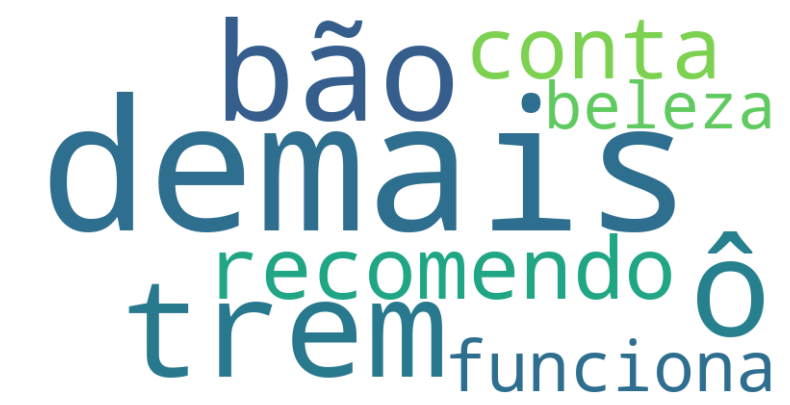

In [ ]:
# Juntar textos da categoria positiva e converter para minúsculas
texto_positivo = " ".join([textos_treino[i].lower() for i in range(len(textos_treino)) if rotulos_treino[i] == "positivo"])

# Remover stopwords do texto
palavras_filtradas = " ".join([palavra for palavra in texto_positivo.split() if palavra not in stop_words])

# Criar nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(palavras_filtradas)

# Exibir nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

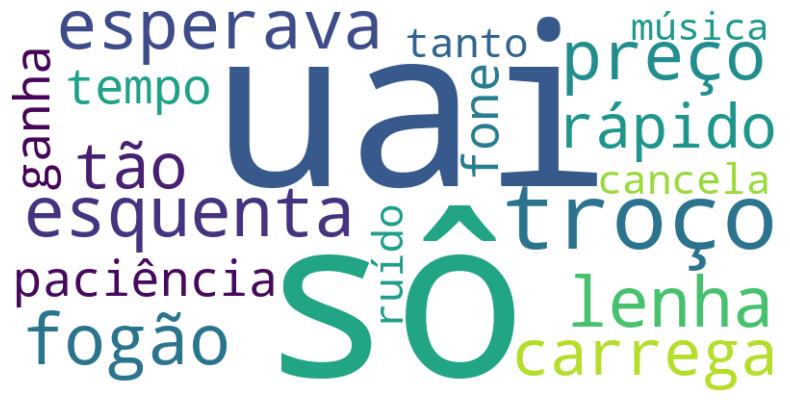

In [ ]:
# Juntar textos da categoria negativas e converter para minúsculas
texto_negativo = " ".join([textos_treino[i].lower() for i in range(len(textos_treino)) if rotulos_treino[i] == "negativo"])

# Remover stopwords do texto
palavras_filtradas = " ".join([palavra for palavra in texto_negativo.split() if palavra not in stop_words])

# Criar nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(palavras_filtradas)

# Exibir nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Compartilhando os resultados

In [ ]:
# Criar o arquivo app.py
code = """
import streamlit as st

st.title("Hello, Streamlit!")
st.write("Este é um aplicativo simples usando Streamlit no Google Colab.")
"""

# Escreve o código no arquivo app.py
with open("app.py", "w") as file:
    file.write(code)

print("Arquivo app.py criado com sucesso!")

Arquivo app.py criado com sucesso!


In [ ]:
!pip install -q streamlit

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.188.225.41
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://shaggy-sides-punch.loca.lt
